In [8]:
# import libs
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data from *.csv
test_set = pd.read_csv('data/TestSet.csv')
train_set = pd.read_csv('data/TrainingSet.csv')
test_subset = pd.read_csv('data/TestSubset.csv')
train_subset = pd.read_csv('data/TrainingSubset.csv')

# check information of 'train_set'
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258588 entries, 0 to 258587
Data columns (total 28 columns):
EbayID                     258588 non-null float64
QuantitySold               258588 non-null int64
Price                      258588 non-null float64
PricePercent               258588 non-null float64
StartingBidPercent         258588 non-null float64
SellerName                 258588 non-null object
SellerClosePercent         258588 non-null float64
Category                   258588 non-null int64
PersonID                   258588 non-null int64
StartingBid                258588 non-null float64
AvgPrice                   258588 non-null float64
EndDay                     258588 non-null int64
HitCount                   258588 non-null int64
AuctionAvgHitCount         258588 non-null int64
ItemAuctionSellPercent     258588 non-null int64
SellerSaleAvgPriceRatio    258588 non-null float64
SellerAvg                  258588 non-null float64
SellerItemAvg              258588 non

In [9]:
print(train_set[:3])

         EbayID  QuantitySold  Price  PricePercent  StartingBidPercent  \
0  1.609830e+11             1  27.25        1.4787              0.0537   
1  3.905500e+11             1  43.00        1.4422              0.3350   
2  2.009010e+11             1  11.00        0.5969              0.5426   

      SellerName  SellerClosePercent  Category  PersonID  StartingBid  \
0      petesandi            0.925926     73396      9174         0.99   
1     graphn4fun            0.990566     27278     11046         9.99   
2  hondo19461946            0.422131     73396      9174        10.00   

          ...          AuctionHitCountAvgRatio  BestOffer  ReturnsAccepted  \
0         ...                               29   1.540541                0   
1         ...                               55   0.404762                0   
2         ...                               21   0.324324                0   

   IsHOF  ItemListedCount  AuctionCount  AuctionSaleCount  SellerAuctionCount  \
0      1        

In [10]:
train = train_set.drop(['EbayID','QuantitySold','SellerName'],axis=1)
train_target = train_set['QuantitySold']

# get total num of features
_, n_features = train.shape

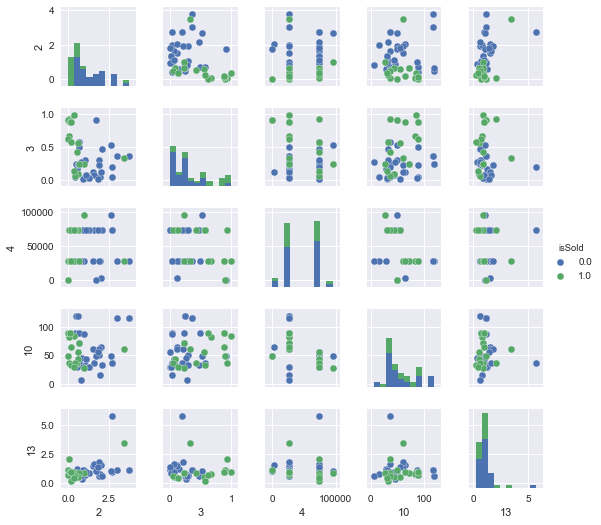

In [13]:
# isSold -> 1:success | 0:fail
df = DataFrame(np.hstack((train,train_target[:, None])), columns=range(n_features) + ["isSold"])
_ = sns.pairplot(df[:50], vars=[2,3,4,10,13], hue="isSold", size=1.5)
plt.show()

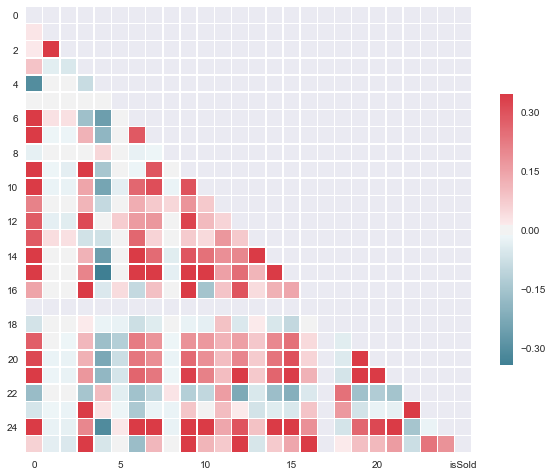

In [14]:
plt.figure(figsize=(10,10))

# 计算数据的相关性矩阵
corr = df.corr()

# 产生遮挡出热度图上三角部分的mask，因为这个热度图为对称矩阵，所以只输出下三角部分即可
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 产生热度图中对应的变化的颜色
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 调用seanborn中的heat创建热度图
sns.heatmap(corr, mask=mask, cmap=cmap, vmax = .3,
                square=True, xticklabels=5, yticklabels=2,
                linewidths=.5, cbar_kws={"shrink":.5})

# 将yticks旋转至水平方向，方便查看
plt.yticks(rotation=0)

plt.show()